In [1]:
#1.資料取得
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
i_filepath = '/content/MyGoogleDrive/MyDrive/AI/Python-for-Titanic/Ch10/'
df=pd.read_csv(i_filepath + 'ShoeSize.csv')
df.columns = ['ID','Gender','Height_cm','Weight_kg','Shoe_size_cm']
df.head()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).


,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10009 non-null  int64  
 1   Gender        10009 non-null  object 
 2   Height_cm     10004 non-null  float64
 3   Weight_kg     9999 non-null   float64
 4   Shoe_size_cm  9994 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 391.1+ KB


In [3]:
df[df.duplicated()]

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
284,284,Male,172.0,86.0,28.0
325,302,Female,172.0,69.0,25.5
434,425,Female,160.0,56.0,24.0
493,490,Female,162.0,66.0,24.0
669,665,Female,162.0,64.0,24.0
819,796,Female,154.0,45.0,23.5
876,870,Female,149.0,56.0,22.0
917,896,Female,157.0,67.0,23.0
990,956,Female,157.0,50.0,23.0


In [4]:
#2.1資料處理
df = df.drop_duplicates()
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     9995 non-null   float64
 3   Weight_kg     9990 non-null   float64
 4   Shoe_size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB


In [5]:
#2.2
df.describe()

,ID,Height_cm,Weight_kg,Shoe_size_cm
count,10000.00000,9995.000000,9990.000000,9985.000000
mean,5000.50000,167.951276,72.617618,26.031097
std,2886.89568,9.767864,14.543927,2.479222
min,1.00000,137.000000,28.000000,19.500000
25%,2500.75000,161.000000,61.000000,24.000000
50%,5000.50000,168.000000,73.000000,26.000000
75%,7500.25000,175.000000,84.000000,28.500000
max,10000.00000,200.000000,122.000000,31.500000


In [6]:
df.isnull()

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
10004,False,False,False,False,False
10005,False,False,False,False,False
10006,False,False,False,False,False
10007,False,False,False,False,False


In [7]:
df.isnull().sum()

ID               0
Gender           0
Height_cm        5
Weight_kg       10
Shoe_size_cm    15
dtype: int64

In [8]:
df.isnull().count()

ID              10000
Gender          10000
Height_cm       10000
Weight_kg       10000
Shoe_size_cm    10000
dtype: int64

In [9]:
#呼叫isnull()函示檢視H中有缺失值的資料
df[df['Height_cm'].isnull()==True]

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
12,13,Male,NaN,102.0,30.0
53,54,Male,NaN,103.0,29.5
858,852,Female,NaN,63.0,24.0
899,893,Female,NaN,54.0,22.0
953,946,Female,NaN,54.0,22.5


In [10]:
df[df['Weight_kg'].isnull()==True]

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
202,203,Male,177.0,NaN,28.5
316,316,Female,152.0,NaN,22.5
350,349,Female,157.0,NaN,22.5
384,383,Female,157.0,NaN,22.5
432,431,Female,154.0,NaN,22.5
504,501,Female,154.0,NaN,23.5
695,691,Female,162.0,NaN,24.0
712,708,Female,165.0,NaN,24.0
730,726,Male,167.0,NaN,27.5
759,755,Male,172.0,NaN,28.0


In [11]:
df.groupby(['Gender','Weight_kg','Shoe_size_cm']).mean().head(20)

ID   Height_cm
Gender Weight_kg Shoe_size_cm                         
Female 28.0      20.0           845.000000  137.000000
       31.0      20.0          1936.000000  141.000000
       32.0      19.5          4883.000000  138.000000
                 20.5          9429.000000  145.000000
       34.0      20.0           644.000000  142.000000
       35.0      20.0          7927.000000  147.000000
                 20.5          5948.500000  141.500000
       36.0      21.5          2008.000000  142.000000
       37.0      21.0          6779.500000  149.500000
       38.0      20.5          4745.333333  142.000000
                 21.0          6557.000000  144.000000
                 22.0          7827.000000  148.000000
                 22.5          5628.000000  153.000000
       39.0      20.0          6878.000000  142.000000
                 21.0          5393.500000  146.000000
                 21.5          7853.000000  152.000000
                 22.0          3006.000000  150.000000
       40.0      20.5          4172.000000  141.000000
                 21.0          3026.428571  144.714286
                 21.5          2224.000000  140.000000

In [12]:
df['Height_cm']=df['Height_cm'].fillna(df.groupby(['Gender','Weight_kg','Shoe_size_cm'])['Height_cm'].transform('mean'))
df['Weight_kg']=df['Weight_kg'].fillna(df.groupby(['Gender','Height_cm','Shoe_size_cm'])['Weight_kg'].transform('mean'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     10000 non-null  float64
 3   Weight_kg     10000 non-null  float64
 4   Shoe_size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB


In [14]:
#2.3將Shoe size_cm缺失值刪除
df.isnull()

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
10004,False,False,False,False,False
10005,False,False,False,False,False
10006,False,False,False,False,False
10007,False,False,False,False,False


In [15]:
df.isnull().sum()

ID               0
Gender           0
Height_cm        0
Weight_kg        0
Shoe_size_cm    15
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   object 
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe_size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.0+ KB


In [18]:
#2.4重新編號列索引
df = df.reset_index(drop=True)

In [19]:
#2.5
s = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].map(s)
df.head()

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
0,1,1,175.0,83.0,28.0
1,2,1,195.0,112.0,31.0
2,3,1,175.0,90.0,28.5
3,4,0,154.0,58.0,22.5
4,5,0,154.0,58.0,22.5


In [20]:
df['Shoe_size_cm'] = df['Shoe_size_cm'].map(int)
df

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm
0,1,1,175.0,83.0,28
1,2,1,195.0,112.0,31
2,3,1,175.0,90.0,28
3,4,0,154.0,58.0,22
4,5,0,154.0,58.0,22
...,...,...,...,...,...
9980,9996,0,157.0,59.0,23
9981,9997,1,183.0,98.0,29
9982,9998,0,162.0,61.0,24
9983,9999,0,160.0,57.0,24


In [21]:
#2.6新增行欄位BMI
df['BMI'] =df['Weight_kg']/(df['Height_cm']/100)**2

In [22]:
df

,ID,Gender,Height_cm,Weight_kg,Shoe_size_cm,BMI
0,1,1,175.0,83.0,28,27.102041
1,2,1,195.0,112.0,31,29.454306
2,3,1,175.0,90.0,28,29.387755
3,4,0,154.0,58.0,22,24.456063
4,5,0,154.0,58.0,22,24.456063
...,...,...,...,...,...,...
9980,9996,0,157.0,59.0,23,23.936062
9981,9997,1,183.0,98.0,29,29.263340
9982,9998,0,162.0,61.0,24,23.243408
9983,9999,0,160.0,57.0,24,22.265625


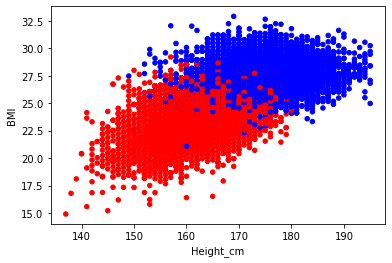

In [23]:
#3 觀察男女的Height_cm和BMI的分布情形
c = {0:'r',1:'b'}
df['colors'] = df['Gender'].map(c)
df.plot(kind='scatter', x='Height_cm', y='BMI', c=df['colors'])

In [24]:
#4
df_X = df[['Gender','Height_cm','BMI']]

In [25]:
from sklearn.cluster import KMeans

In [26]:
s = []
for k in range(1,15):
  km = KMeans(n_clusters=k)
  km.fit(df_X)
  s.append(km.inertia_)
print(s)

[1022615.5496401543, 351606.6419045128, 200253.856541318, 136535.99735204142, 105637.52250888973, 86947.06133749787, 75660.35818355829, 66297.8619862118, 59051.06216836468, 53515.84880500681, 49016.05179915053, 45754.47225457586, 42659.080946988244, 39451.20532421092]


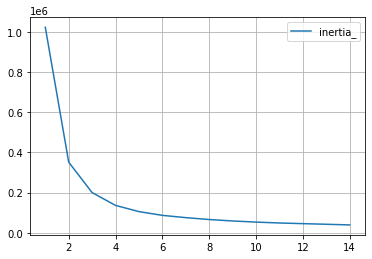

In [27]:
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = s
df_kmeans.index = list(range(1,15))
df_kmeans.plot(grid=True)

In [28]:
k = 2
km = KMeans(n_clusters=k)
km.fit(df_X)
print('分群準確性:', km.inertia_)
pred = km.fit_predict(df_X)
print('分群的預測結果：', pred)


分群準確性: 351606.6419045128
分群的預測結果： [0 0 0 ... 1 1 1]


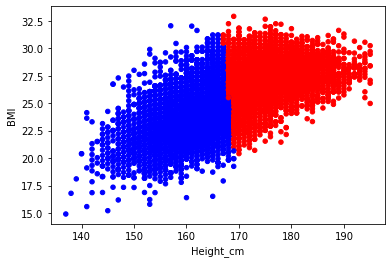

In [29]:
df1 = df_X.copy()
df1['pred'] = pred
c = {0:'r', 1:'b'}
df1['colors'] = df1['pred'].map(c)
df1.plot(kind='scatter', x='Height_cm',y='BMI',c=df1['colors'])

In [30]:
new = [[1,176,24.85]]
v=km.predict(new)
print('預測結果為：', v)

預測結果為： [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
new = [[0,162,20.19]]
v=km.predict(new)
print('預測結果為：', v)

預測結果為： [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
